In [23]:
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
# from pyaffyio import read_cel

In [11]:
from Bio.Affy import CelFile
with open("GSE24982_RAW/GSM613571.cel/GSM613571.cel", "r") as handle:
    c = CelFile.read(handle)

In [12]:
c

In [13]:
print(c.ncols, c.nrows)

834 834


In [14]:
print(c.intensities)

[[  64. 7700.   80. ... 8104.   70. 8331.]
 [7729.  102. 7433. ...   97. 7762.   84.]
 [  79. 7710.   97. ... 7590.  104. 7893.]
 ...
 [7810.  138. 7524. ...  112. 8269.   95.]
 [ 100. 7492.   98. ... 8496.  120. 9119.]
 [8253.  114. 8463. ...  109. 8909.   68.]]


In [15]:
print(c.stdevs)

[[  11.3 1633.2   11.7 ... 1466.2   14.4 1651.4]
 [1474.8   20.4 1573.9 ...   21.9 1279.9   23. ]
 [  16.9 1015.    21.  ... 1434.9   18.2 1353.6]
 ...
 [1243.3   30.9 1407.9 ...   18.2 1667.1   13.8]
 [  24.1 1512.    21.6 ... 1550.    27.7 1477.8]
 [1685.4   33.3 1750.7 ...   20.9 1225.3   14.6]]


In [16]:
print(c.npix)

[[25 25 25 ... 25 25 25]
 [25 25 25 ... 25 25 25]
 [25 25 25 ... 25 25 25]
 ...
 [25 25 25 ... 25 25 25]
 [25 25 25 ... 25 25 25]
 [25 25 25 ... 25 25 25]]


In [26]:
print(np.unique(c.npix))

[25]


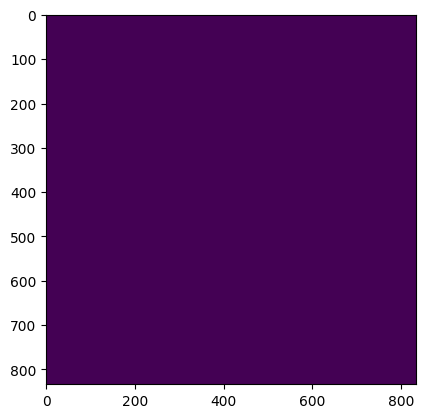

In [24]:
plt.imshow(c.npix)

In [17]:
sc_data = sc.AnnData(np.array(c.intensities))
sc.pp.normalize_total(sc_data, target_sum=1e4)
sc.pp.log1p(sc_data)

In [18]:
sc_data

AnnData object with n_obs × n_vars = 834 × 834
    uns: 'log1p'

In [19]:
# Perform quality control
sc.pp.filter_cells(sc_data, min_genes=200)
sc.pp.filter_genes(sc_data, min_cells=3)

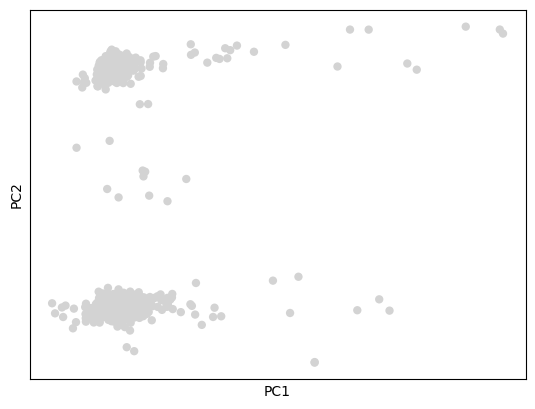

C:\Users\YUI2KOR\AppData\Local\Temp\ipykernel_32904\2657640958.py:8: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(sc_data)


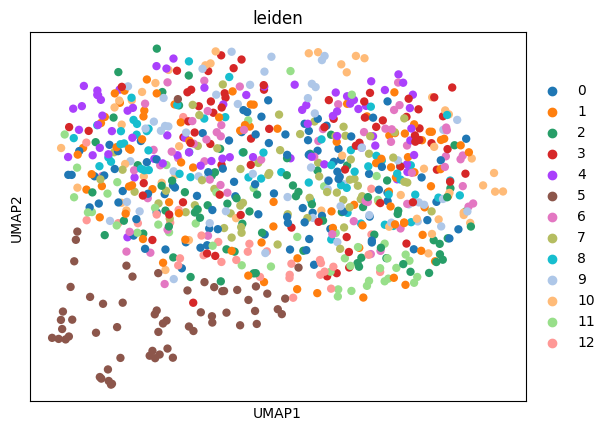

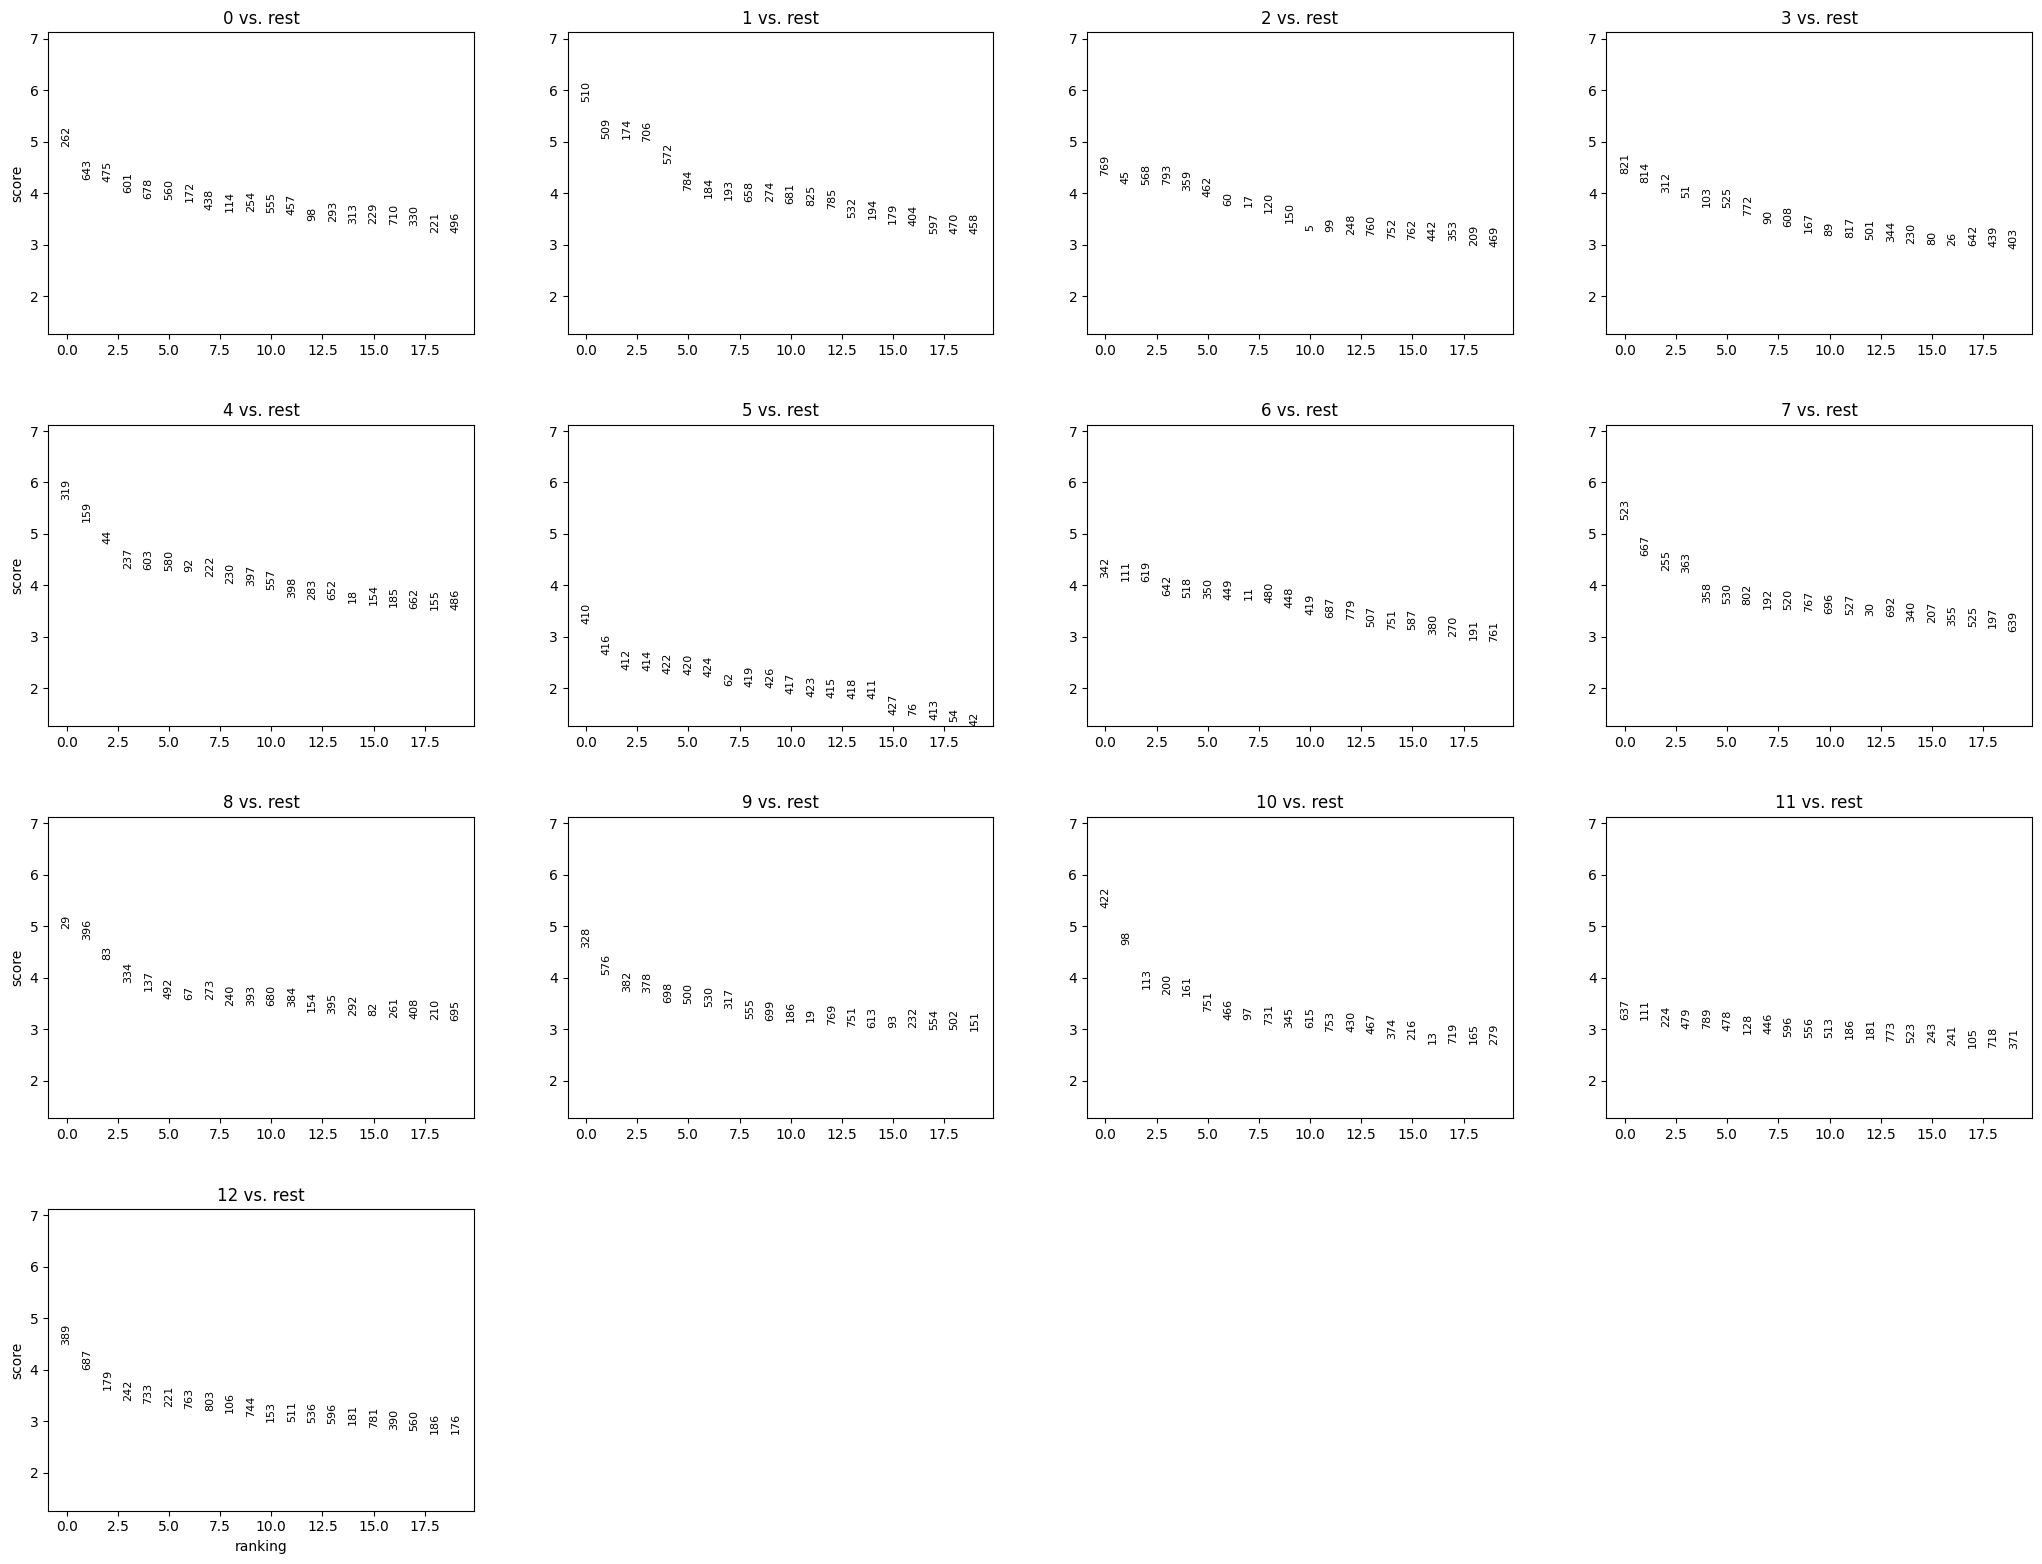

In [22]:
# PCA
sc.tl.pca(sc_data)
sc.pl.pca(sc_data)

# Clustering
sc.pp.neighbors(sc_data)
sc.tl.umap(sc_data)
sc.tl.leiden(sc_data)
sc.pl.umap(sc_data, color='leiden')

# Differential expression analysis
sc.tl.rank_genes_groups(sc_data, 'leiden', method='t-test')
sc.pl.rank_genes_groups(sc_data)